In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings('ignore')


In [2]:
import seaborn as sns

In [3]:
data = pd.read_csv('D:\Data\kaggle datasets\movie_IMDB.csv')

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.shape

(5043, 28)

In [6]:
data.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

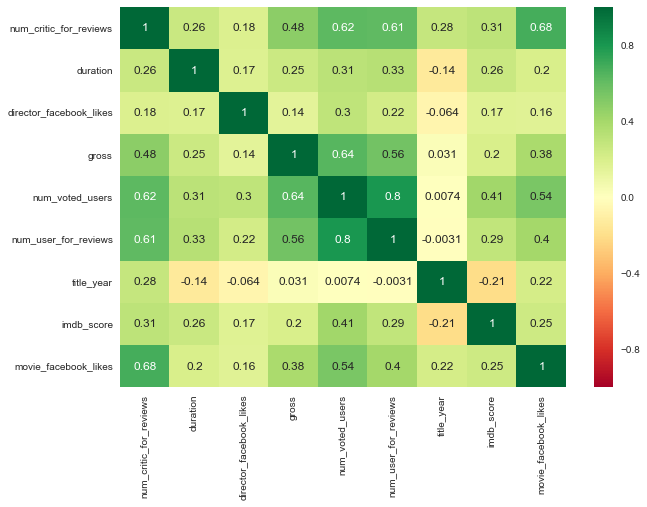

In [7]:
# most correlated features
corrmat = data.corr()
plt.figure(figsize = (10,7))
# or fig, ax = plt.subplots(figsize=(20, 10))
top_corr_features = corrmat.index[abs(corrmat["imdb_score"])>0.1]
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
numerical_features = data.select_dtypes(exclude=['object']).columns
ndata = data[numerical_features]
ndata = ndata.fillna(ndata.mean())

In [12]:
ndata.shape

(5043, 16)

In [15]:
# Build PCA using standarized trained data

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=None, svd_solver="full")
pca.fit(StandardScaler().fit_transform(ndata))
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)


In [16]:
pca.explained_variance_ratio_

array([  2.75117698e-01,   1.30165133e-01,   8.59322234e-02,
         6.48591973e-02,   6.26484674e-02,   6.11163229e-02,
         5.71479052e-02,   5.48734991e-02,   4.96645520e-02,
         4.53531924e-02,   3.24237177e-02,   2.86016150e-02,
         2.57737121e-02,   1.67145668e-02,   9.48926029e-03,
         1.18937526e-04])

In [17]:
cum_var_exp

array([ 0.2751177 ,  0.40528283,  0.49121505,  0.55607425,  0.61872272,
        0.67983904,  0.73698695,  0.79186045,  0.841525  ,  0.88687819,
        0.91930191,  0.94790352,  0.97367724,  0.9903918 ,  0.99988106,  1.        ])

In [19]:
range(1, 16)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

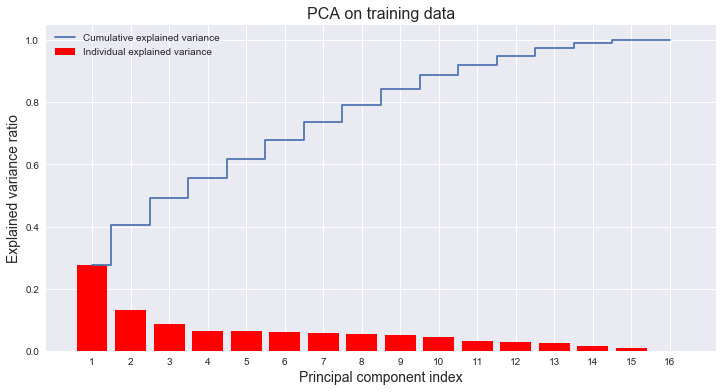

In [20]:
plt.figure(figsize=(12, 6))
plt.bar(range(1, 17), pca.explained_variance_ratio_, align="center",
        color='red', label="Individual explained variance")
plt.step(range(1, 17), cum_var_exp, where="mid", label="Cumulative explained variance")
plt.xticks(range(1, 17))
plt.legend(loc="best")
plt.xlabel("Principal component index", {"fontsize": 14})
plt.ylabel("Explained variance ratio", {"fontsize": 14})
plt.title("PCA on training data", {"fontsize": 16});

## Delete the highly corelated features 

In [8]:
data.columns.tolist()

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [9]:
data.drop(['num_user_for_reviews','num_critic_for_reviews'],inplace = True, axis = 1)

In [10]:
data_null = data.isnull().sum()
data_null = data_null[data_null>0]
data_null.sort_values(ascending=False)[:10]

gross                      884
budget                     492
aspect_ratio               329
content_rating             303
plot_keywords              153
title_year                 108
director_name              104
director_facebook_likes    104
actor_3_facebook_likes      23
actor_3_name                23
dtype: int64

In [11]:
corrmat.sort_values(["imdb_score"], ascending = False, inplace = True)
print(corrmat.imdb_score)

imdb_score                   1.00
num_voted_users              0.41
num_critic_for_reviews       0.31
num_user_for_reviews         0.29
duration                     0.26
movie_facebook_likes         0.25
gross                        0.20
director_facebook_likes      0.17
cast_total_facebook_likes    0.09
actor_2_facebook_likes       0.08
actor_1_facebook_likes       0.08
aspect_ratio                 0.06
actor_3_facebook_likes       0.05
budget                       0.03
facenumber_in_poster        -0.06
title_year                  -0.21
Name: imdb_score, dtype: float64


In [12]:
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features

Index([u'color', u'director_name', u'actor_2_name', u'genres', u'actor_1_name',
       u'movie_title', u'actor_3_name', u'plot_keywords', u'movie_imdb_link',
       u'language', u'country', u'content_rating'],
      dtype='object')

In [13]:
numerical_features = data.select_dtypes(exclude=['object']).columns
categorical_features.size,numerical_features.size

(12, 14)

In [14]:
categorical_features.size,numerical_features.size

(12, 14)

In [15]:
numerical_features = numerical_features.drop("imdb_score")

In [16]:
num_data = data[numerical_features]
cat_data = data[categorical_features]

In [17]:
print("NAs for numerical features in whole data : " + str(num_data.isnull().values.sum()))
num_data = num_data.fillna(num_data.mean())
print("Remaining NAs for numerical features in train : " + str(num_data.isnull().values.sum()))

NAs for numerical features in whole data : 1988
Remaining NAs for numerical features in train : 0


In [18]:
from scipy.stats import skew 
skewness = num_data.apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.5]
skewness.index

Index([u'duration', u'director_facebook_likes', u'actor_3_facebook_likes',
       u'actor_1_facebook_likes', u'gross', u'num_voted_users',
       u'cast_total_facebook_likes', u'facenumber_in_poster', u'budget',
       u'title_year', u'actor_2_facebook_likes', u'aspect_ratio',
       u'movie_facebook_likes'],
      dtype='object')

In [19]:
skew_features = num_data[skewness.index]
skew_features  = np.log1p(skew_features)
num_data[skewness.index] = skew_features

In [42]:
num_data.shape

(5043, 13)

In [60]:
from sklearn.model_selection import train_test_split # to split the data into two parts
X_train,X_test,y_train,y_test = train_test_split(num_data,data['imdb_score'], random_state = 0)

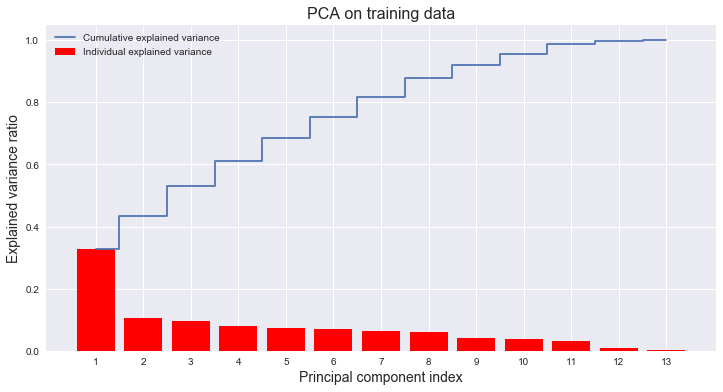

In [61]:
# Build PCA using standarized trained data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=None, svd_solver="full")
pca.fit(StandardScaler().fit_transform(X_train))
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(12, 6))
plt.bar(range(1, 14), pca.explained_variance_ratio_, align="center",
        color='red', label="Individual explained variance")
plt.step(range(1, 14), cum_var_exp, where="mid", label="Cumulative explained variance")
plt.xticks(range(1, 14))
plt.legend(loc="best")
plt.xlabel("Principal component index", {"fontsize": 14})
plt.ylabel("Explained variance ratio", {"fontsize": 14})
plt.title("PCA on training data", {"fontsize": 16});

In [62]:
pca = PCA(n_components=10, svd_solver="full")
pca.fit(StandardScaler().fit_transform(X_train))
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

In [46]:
cum_var_exp

array([ 0.32932232,  0.43526509,  0.53138885,  0.61054624,  0.68369971,
        0.75359888,  0.81859987,  0.87908176,  0.919529  ,  0.95628087])

In [47]:
## Lasso on only Numeric Features

In [65]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


#lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3
lasso_cv = LassoCV(alphas=alphas, random_state=0)
# lasso_cv = Lasso(alpha = 0.001)
lasso_cv.fit(X_train, y_train)
lasso_cv.score(X_train, y_train)
#lasso_cv.predict(X_test)

0.21396511392506401

In [20]:
data['genres'].isnull().sum()

0

In [21]:
df_genres = pd.DataFrame(cat_data['genres'])
# genre_labels = set()
# for s in data['genres'].str.split('|').values:
#     genre_labels = genre_labels.union(set(s))

df_genres = pd.DataFrame(df_genres.genres.str.split('|').tolist(),columns = ["Genre_"+str(i) for i in  range(0,8)] )
cat_data.drop('genres',inplace = True, axis = 1)

cat_data = cat_data.merge(df_genres,left_index = True,right_index = True)

In [22]:
cat_data.shape

(5043, 19)

In [23]:
cat_data.head(5)

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7
0,Color,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,Color,Gore Verbinski,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,Action,Adventure,Fantasy,None,None,None,None,None
2,Color,Sam Mendes,Rory Kinnear,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13,Action,Adventure,Thriller,None,None,None,None,None
3,Color,Christopher Nolan,Christian Bale,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13,Action,Thriller,None,None,None,None,None,None
4,NaN,Doug Walker,Rob Walker,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,Documentary,None,None,None,None,None,None,None


In [24]:
cat_data.color.value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [25]:
cat_data.drop('color',inplace = True,axis = 1)

In [26]:
cat_data.columns.tolist()

['director_name',
 'actor_2_name',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'movie_imdb_link',
 'language',
 'country',
 'content_rating',
 'Genre_0',
 'Genre_1',
 'Genre_2',
 'Genre_3',
 'Genre_4',
 'Genre_5',
 'Genre_6',
 'Genre_7']

In [27]:
cat_data.drop('director_name',inplace = True,axis = 1)

In [29]:
cat_data.drop(['actor_2_name',
 'actor_1_name',
 'movie_title',
 'actor_3_name'],inplace = True,axis = 1)

In [30]:
cat_data.drop(['movie_imdb_link'],inplace = True,axis = 1)

In [31]:
cat_data.drop(['Genre_3',
 'Genre_4',
 'Genre_5',
 'Genre_6',
 'Genre_7'],inplace = True,axis = 1)

In [32]:
cat_data.drop(['Genre_1','Genre_2'],inplace = True,axis = 1)

In [33]:
df_plot_keywords = pd.DataFrame(cat_data['plot_keywords'])
# genre_labels = set()
# for s in data['genres'].str.split('|').values:
#     genre_labels = genre_labels.union(set(s))
df_plot_keywords['plot_keywords'].fillna(value = 'None',inplace = True)
df_plot_keywords = pd.DataFrame(df_plot_keywords['plot_keywords'].str.split('|').tolist(),columns = ["Plot_"+str(i) for i in  range(0,5)] )
cat_data.drop('plot_keywords',inplace = True, axis = 1)

cat_data = cat_data.merge(df_plot_keywords,left_index = True,right_index = True)

In [34]:
cat_data.columns


Index([u'language', u'country', u'content_rating', u'Genre_0', u'Plot_0',
       u'Plot_1', u'Plot_2', u'Plot_3', u'Plot_4'],
      dtype='object')

In [28]:
cat_data.shape

(5043, 17)

### This is Crazy

In [29]:
# data.rename(columns = {'director_facebook_likes':'dir_fb_likes','actor_1_facebook_likes':'actor_1_fb','actor_3_facebook_likes':'actor_3_fb','actor_2_facebook_likes':'actor_2_fb'},inplace = True)

# import seaborn as sns 
# plt.figure(figsize=(14,4))
# sns.countplot(num_data['gross'],label='imdb_score')
# plt.show()

# fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(16,15))
# sns.boxplot(x= 'imdb_score',data = data,orient = 'v',saturation = 1, ax = ax[0,0])
# sns.boxplot(x= 'gross',data = data,orient = 'v',saturation = 1, ax = ax[0,1])
# sns.boxplot(x= 'budget',data = data,orient = 'v',saturation = 1, ax = ax[1,0])
# sns.boxplot(x= 'movie_facebook_likes',data = data,orient = 'v',saturation = 1, ax = ax[1,1])
# sns.boxplot(x= 'cast_total_facebook_likes',data = data,orient = 'v',saturation = 1, ax = ax[2,0])
# sns.boxplot(x= 'dir_fb_likes',data = data,orient = 'v',saturation = 1, ax = ax[2,1])
# sns.boxplot(x= 'actor_1_fb',data = data,orient = 'v',saturation = 1, ax = ax[3,0])

# fig.tight_layout()


# fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,15))
# data1 = data[np.abs(data.imdb_score-data.imdb_score.mean())<=(2*data.imdb_score.std())]
# data2 = data[np.abs(data.imdb_score-data.imdb_score.mean())<=(2*data.imdb_score.std())]

# ax[0,0].hist(data1['imdb_score'],normed = 1,edgecolor='black',linewidth=1.2)
# ax[0,1].hist(data2['imdb_score'],normed = 1,edgecolor='black',linewidth=1.2)

# # plt.hist(data2['imdb_score'],normed = 1,edgecolor='black',linewidth=1.2,ax  = ax[0,1])

# plt.scatter(data1['gross'],data1['imdb_score'])
# plt.show()


# plt.xlabel('IMDB SCORE')
# plt.ylabel('% of Movies')
# plt.hist(data['imdb_score'],normed = 1,edgecolor='black',linewidth=1.2)

# #sns.boxplot(x= 'budget',data = data,orient = 'v',saturation = 1)
# plt.xlabel('budget')
# plt.ylabel('No of Movies')
# plt.hist(data['budget'],edgecolor='black')

# plt.xlabel('dir_fb_likes')
# plt.ylabel('No of Movies')
# plt.hist(data['dir_fb_likes'],edgecolor='black')

# data.head()

# plt.scatter(data['dir_fb_likes'],data['imdb_score'])
# plt.show()

# plt.scatter(data['budget'],data['imdb_score'])
# plt.show()

# data.head(1)

# a = data.groupby('language').agg({'imdb_score':'mean'}).reset_index().sort_values(by = 'imdb_score',ascending = False)


# plt.figure(figsize=(16,6))
# sns.barplot(x="language", y="imdb_score", data=a)

# b = data.groupby(['Genre_0']).agg({'imdb_score':'mean'}).reset_index().sort_values(by = 'imdb_score',ascending = False)[:20
#                                                                                                    ]
# b= b.round(2)

# plt.figure(figsize=(15,6))
# sns.barplot(x="Genre_0", y="imdb_score", data=b)

# c = data.groupby('Director').agg({'gross':'mean'}).reset_index().sort_values(by = 'gross',ascending = False)[:15]
# c.columns

# plt.figure(figsize=(15,6))
# sns.barplot(x="Director", y="gross", data=c)

# d = data.groupby('content_rating').agg({'imdb_score':'mean'}).reset_index().sort_values(by = 'imdb_score',ascending = False)[:15]
# plt.figure(figsize=(15,6))
# sns.barplot(x="content_rating", y="imdb_score", data=d)

# # f, (ax1, ax2) = plt.subplots(2)
# # f.set_size_inches(15, 10)
# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,15))
# sns.barplot(x="content_rating", y="imdb_score", data=d,ax = axes[1])
# sns.barplot(x="language", y="imdb_score", data=a,ax = axes[0])
# sns.barplot(x="Director", y="gross", data=c,ax = axes[2])
# fig.tight_layout()


# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(12, 10))
# plt.title('Pearson Correlation of Movie Features')
# # Draw the heatmap using seaborn
# sns.heatmap(movie_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [30]:
cat_data  = pd.get_dummies(cat_data)

In [31]:
cat_data.shape

(5043, 23498)

In [32]:
cleaned = pd.concat([cat_data,num_data],axis=1)


In [33]:
cleaned.shape

(5043, 23511)

In [36]:
from sklearn.model_selection import train_test_split # to split the data into two parts
X_train,X_test,y_train,y_test = train_test_split(cleaned,data['imdb_score'], random_state = 0)

In [40]:
# Build PCA using standarized trained data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=None, svd_solver="full")
pca.fit(StandardScaler().fit_transform(X_train))
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
# plt.figure(figsize=(12, 6))
# plt.bar(range(1, 18), pca.explained_variance_ratio_, align="center",
#         color='red', label="Individual explained variance")
# plt.step(range(1, 18), cum_var_exp, where="mid", label="Cumulative explained variance")
# plt.xticks(range(1, 18))
# plt.legend(loc="best")
# plt.xlabel("Principal component index", {"fontsize": 14})
# plt.ylabel("Explained variance ratio", {"fontsize": 14})
# plt.title("PCA on training data", {"fontsize": 16});

KeyboardInterrupt: 

In [35]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


#lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3
#lasso_cv = LassoCV(alphas=alphas, random_state=0)
lasso_cv = Lasso(alpha = 0.001).fit(X_train, y_train)

lasso_cv.fit(X_train, y_train)
lasso_cv.score(X_train, y_train)
#lasso_cv.predict(X_test)

KeyboardInterrupt: 

In [ ]:
lasso_cv.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
predicted  = lasso_cv.predict(X_test)